#Assignment introduction

**Time to predict some stuff!** <br> For this assignment, we will try to predict house prices based on the features of the house in question. This means we need to do the following:

1. Load in the data (as per usual)
2. Perform some EDA to get a better understanding of the data
3. Clean up the data
4. Perform feature engineering and choose our feature dimensions
5. Create the feature and target matrix (our X's and y's)
6. Create, fit a model and evaluate performance
7. Set up a data prediction pipeline

This assignment was very much made to give you a lot of creative freedom in how you want to approach your data engineering and model creation. Creating good SML models takes a lot of thinking, effort and testing. You can expect to go back and forth in the notebook a lot to change earlier data engineering steps, so keep your assigned variable names consistent!<br><br>

(**Note:** There is no shame in not creating a super well-performing model, as long as you try out the different methods involved in SML. As the picture below illustrates, sometimes it just goes wrong) <br><br>

The order in which you perform the different steps is more or less up to you, as long as you end up with some sort of trained model that is suitable for this type of prediction. <br>
The way this notebook is laid out, is just to give you a general direction guide in terms of the overarching concepts; data filtering, data engineering, model fitting, testing and evaluation as well as setting up a data pipeline. If it's easier, you're welcome to create a separate notebook instead of working in this one, as long as you cover the tasks included.

![](https://aaubs.github.io/ds-master/media/ML_Daddy.png)

This is not an exhaustive list, but for this assignment you **will** need the following:
1. From Scikitlearn:
- Some sort of encoding library of your own choice
- train_test_split (unless you want to do it manually for whichever reason)
- Some sort of data scaler
2. A visualization library:
- I recommend matplotlib.pyplot and seaborn, but you can try to use altair if you want to
3. Pandas (not the bamboo eating kind)
- Because, duh, we need them dataframes!
4. Joblib or Pickle
- To save each component of the entire process

# Importing modules and loading in the data

**Link to the Data:** <br> https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?resource=download

In [1]:
#import modules and load in the data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Ksper10/sml_assign/main/Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#EDA

**First things first** <br> It's always a good idea to start out with checking for missing values, and dealing with them if there are any. <br> Do we have any missing values that we need to take care of? If so, find a way to handle the missing data (ie removing or replacing/filling them)

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# We can see that there are no missing values at all

**Lets visualize some of the dimensions to get a better idea of our data. <br> Create a plot that shows the distribution of the price dimension. What can we see?**

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


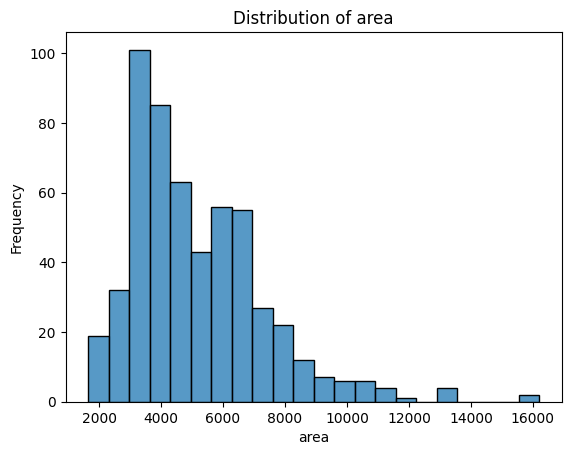

In [9]:
sns.histplot(df['area'])
plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('Frequency')
plt.show()

In [10]:
df['area']

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


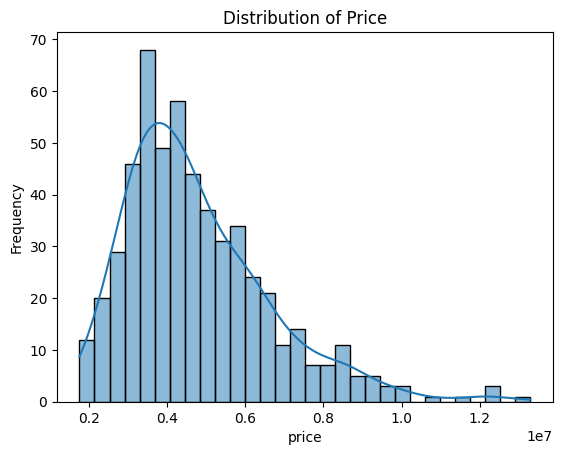

In [11]:
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

**Correlations impact our predictions through statistical inference. Thus understanding which correlations we may be dealing with, is a good tool for choosing our dimensions for the feature matrix. Often these can be quite logical with some understanding of what the data represents <br> Check the correlations of the dimensions**

G2: But since we have string columns, first we will re-arrange the columns order so the columns that we will use for the HOT ENCODE are together

In [12]:
# Get a list of all the columns
cols = list(df.columns)

# Store the column at index 10
col_to_move = cols.pop(10)  # Indexing is 0-based, so 10 refers to the 11th column

# Insert the column back into the list at the desired location
cols.insert(4, col_to_move)  # After 4th column (at the 5th position, since indexing is 0-based)

# Re-order the DataFrame columns
df = df[cols]

In [13]:
# Checking if the respctive columns just have binary values

print(df['mainroad'].unique())
print(df['guestroom'].unique())
print(df['basement'].unique())
print(df['hotwaterheating'].unique())
print(df['airconditioning'].unique())
print(df['prefarea'].unique())
print(df['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


hen to Use:
Use binary encoding when a categorical variable has only two levels (e.g., 'yes'/'no').
Use one-hot encoding when a categorical variable has more than two levels, and there is no inherent order in the categories (e.g., ‘furnishingstatus’ if it has more than two unique values and they don’t have an inherent order).


In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'parking', 'stories',
       'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                'airconditioning', 'prefarea']

# Convert 'yes'/'no', 'y'/'n' to 1/0
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df.head()


,price,area,bedrooms,bathrooms,parking,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,2,3,1,0,0,0,1,1,furnished
1,12250000,8960,4,4,3,4,1,0,0,0,1,0,furnished
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,semi-furnished
3,12215000,7500,4,2,3,2,1,0,1,0,1,1,furnished
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,furnished


Key Takeaway:
Choose pd.get_dummies() for simplicity and direct DataFrame manipulation.
Opt for OneHotEncoder when you need more control, are building complex pipelines, or are preparing for model deployment.

In [16]:
mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping)
df.head()

,price,area,bedrooms,bathrooms,parking,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,2,3,1,0,0,0,1,1,2
1,12250000,8960,4,4,3,4,1,0,0,0,1,0,2
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1
3,12215000,7500,4,2,3,2,1,0,1,0,1,1,2
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,2


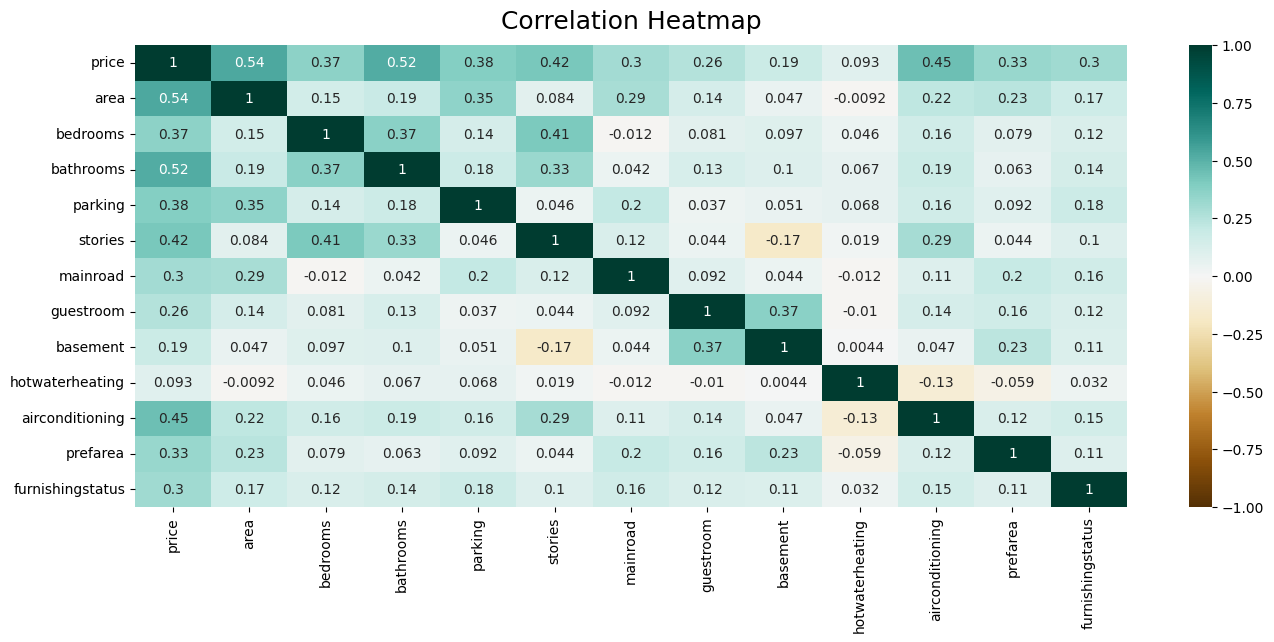

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

#Data preprocessing

##Data cleaning

**Do we have any outliers in our data that may affect our prediction? If so, remove them if you think they could cause issues**

Key Points:
This code will generate box plots for each numeric column in your DataFrame.
Box plots are excellent for visualizing the central tendency and spread of the data, and importantly, for identifying outliers in each column.

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


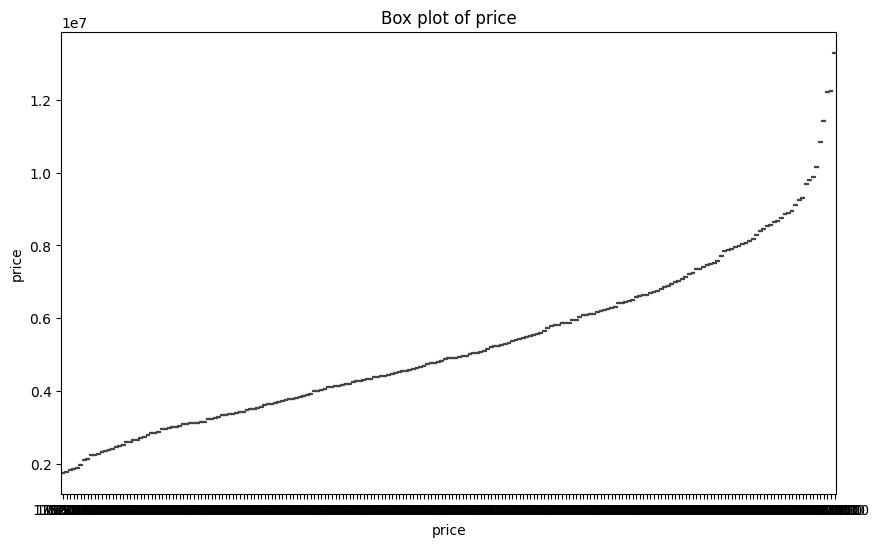

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


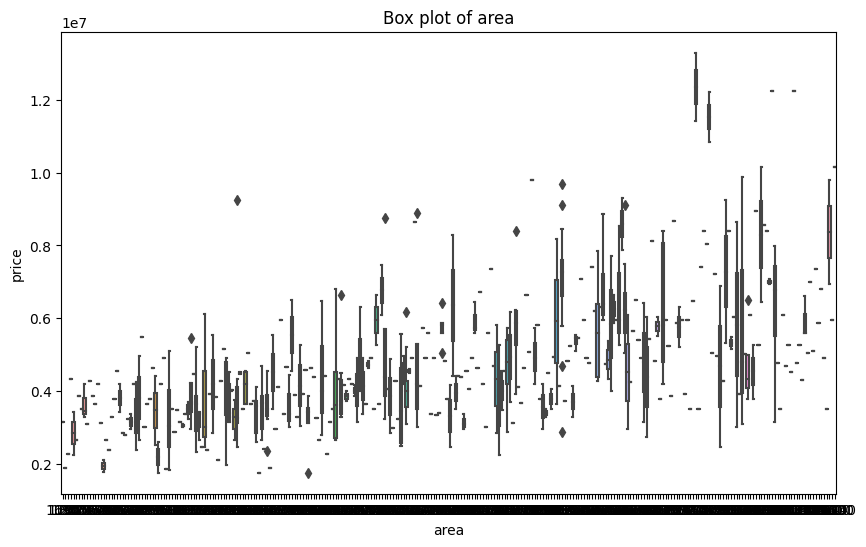

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


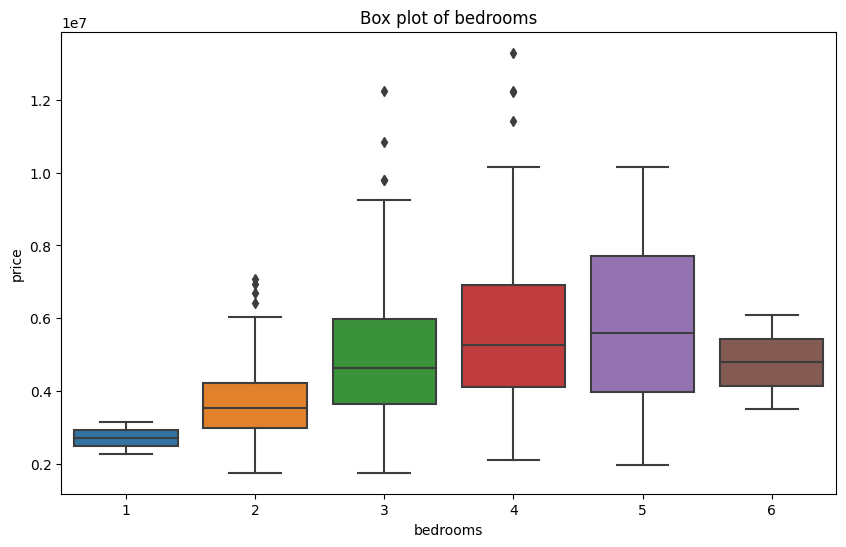

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


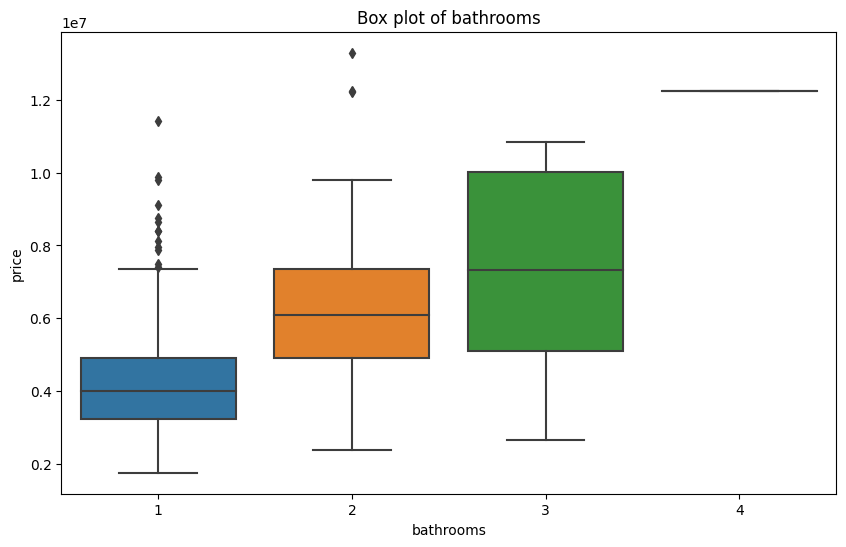

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


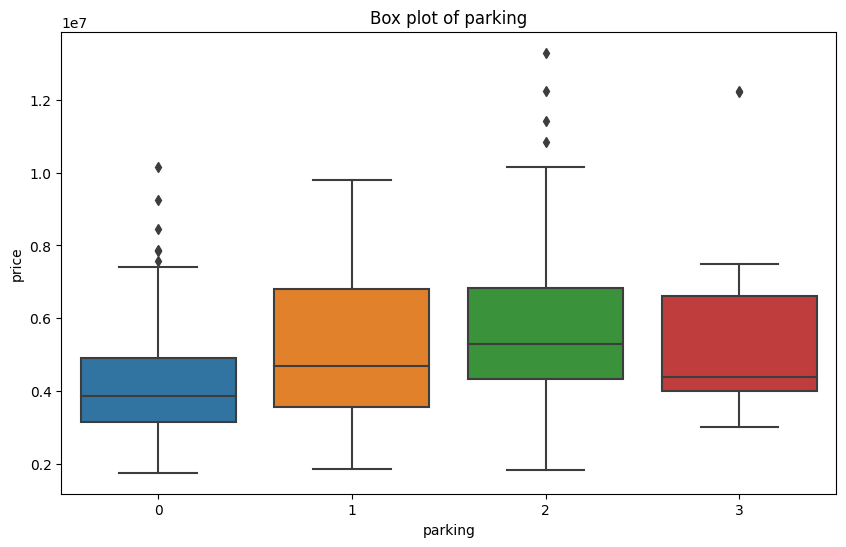

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


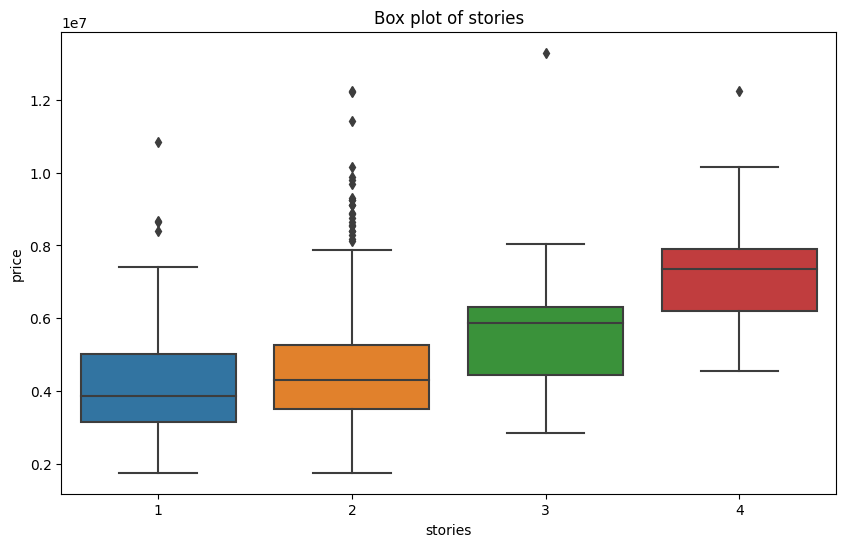

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


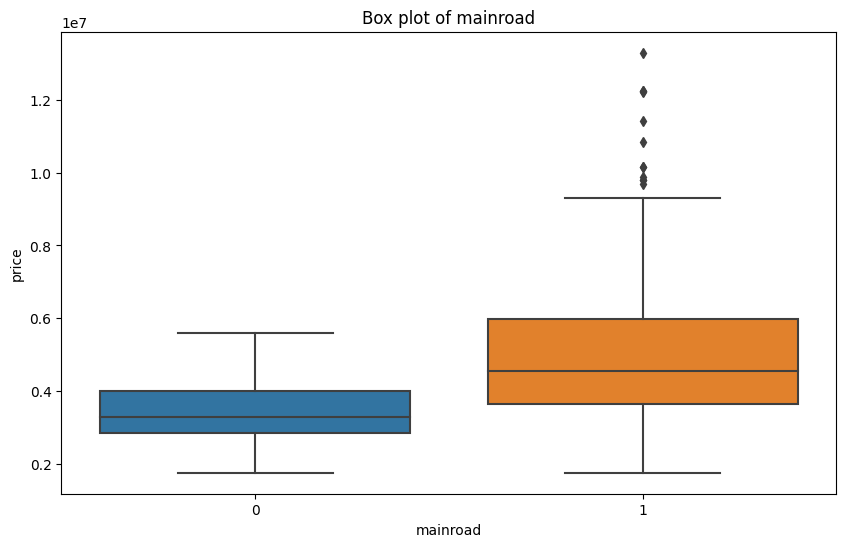

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


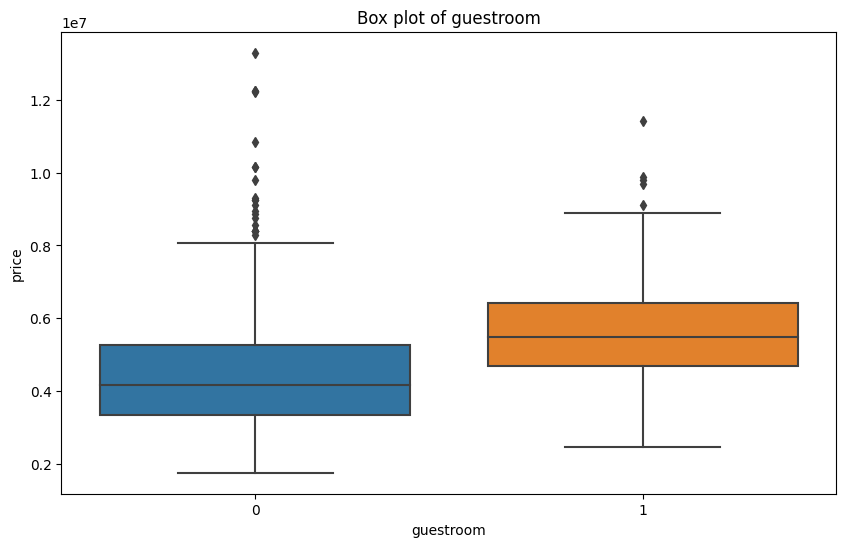

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


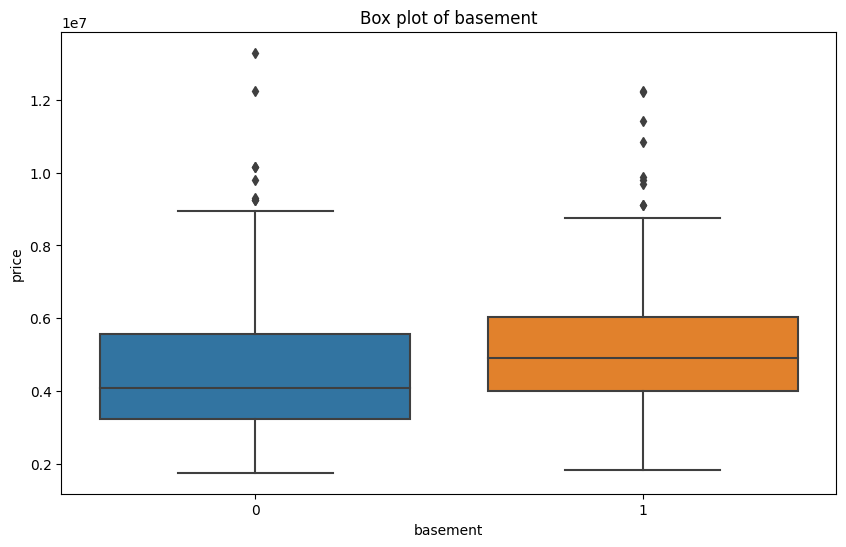

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


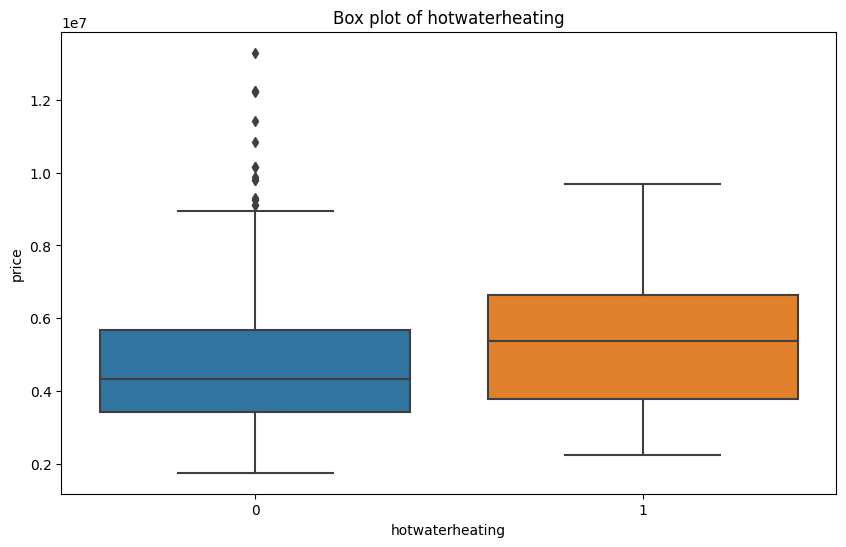

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


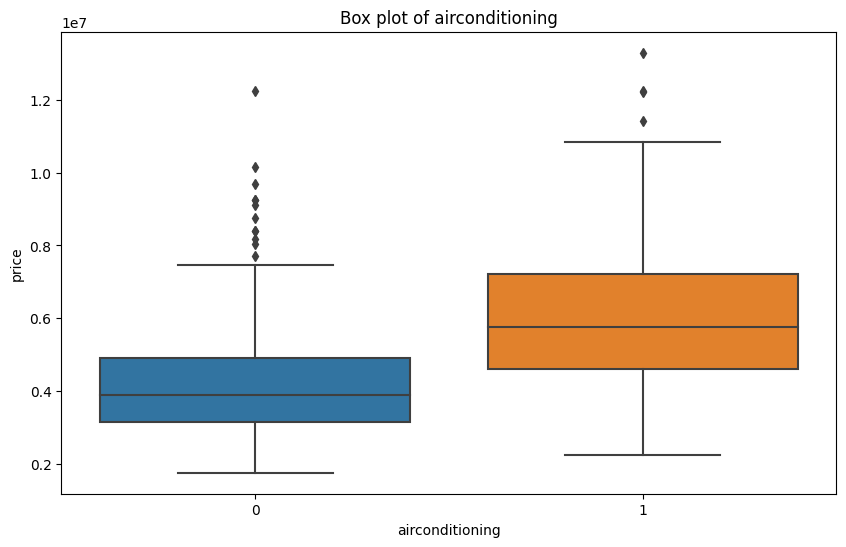

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


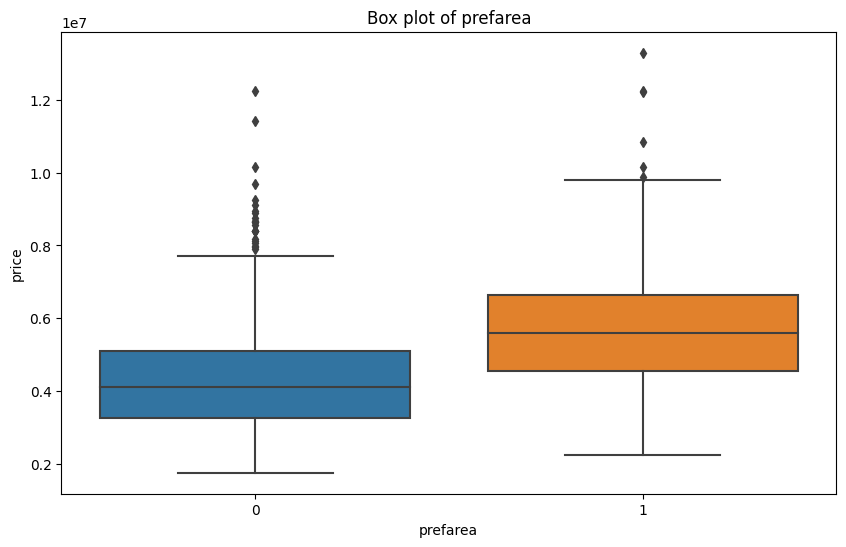

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


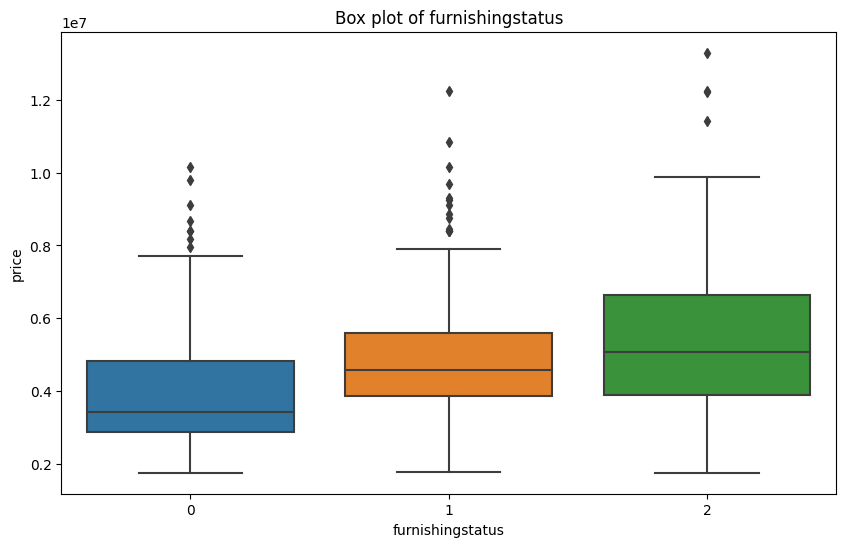

In [18]:
# For Numeric Columns
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col], y=df['price'], orient='v')
    plt.title(f'Box plot of {col}', fontsize=12)
    plt.show()

In [19]:
for c in df.columns:
    print(df[c].unique())

[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000  4893

G2: Because we are using the price alot for our data processing we want to remove the outliers from this variable

In [20]:
len(df.price)

545

In [21]:
df['price_z'] = (df['price'] - df['price'].mean())/df['price'].std(ddof=0)
df['price_z'] = df['price_z'].abs()
df = df[df.price_z < 2]

In [22]:
len(df.price)

519

**Is there any other cleaning that needs to be done? If you believe so, then perform the remaining cleaning and then proceed to the next step**

In [23]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'parking', 'stories',
       'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus', 'price_z'],
      dtype='object')

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

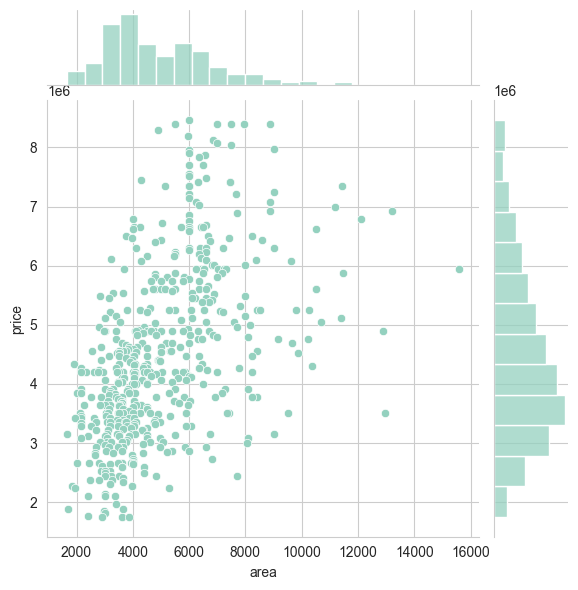

In [24]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='area',y='price',data=df)

In [25]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['area'] = pd.to_numeric(df['area'], errors='coerce')

In [26]:
print(df[['price', 'area']].dtypes)

price    int64
area     int64
dtype: object


In [27]:
print(df[['price', 'area']].isna().sum())

price    0
area     0
dtype: int64


c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


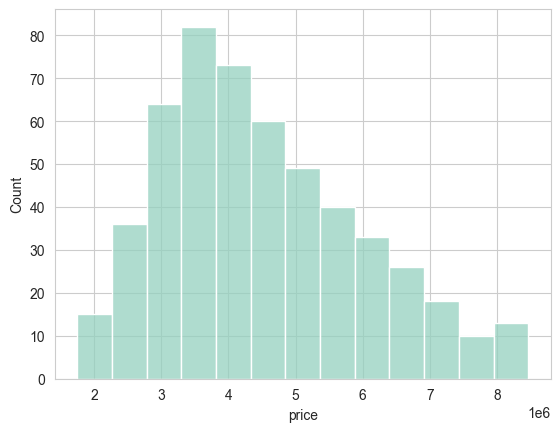

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


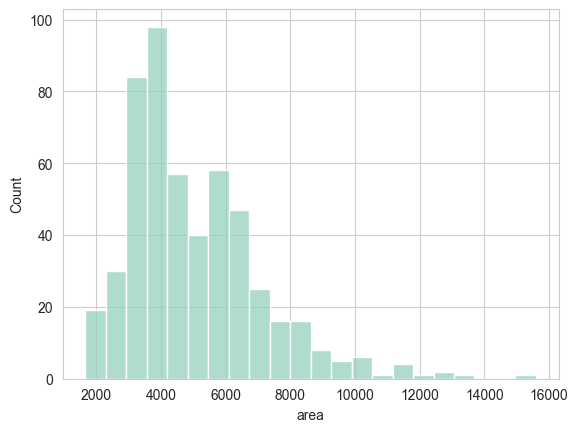

In [28]:
sns.histplot(df['price'])
plt.show()

sns.histplot(df['area'])
plt.show()

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

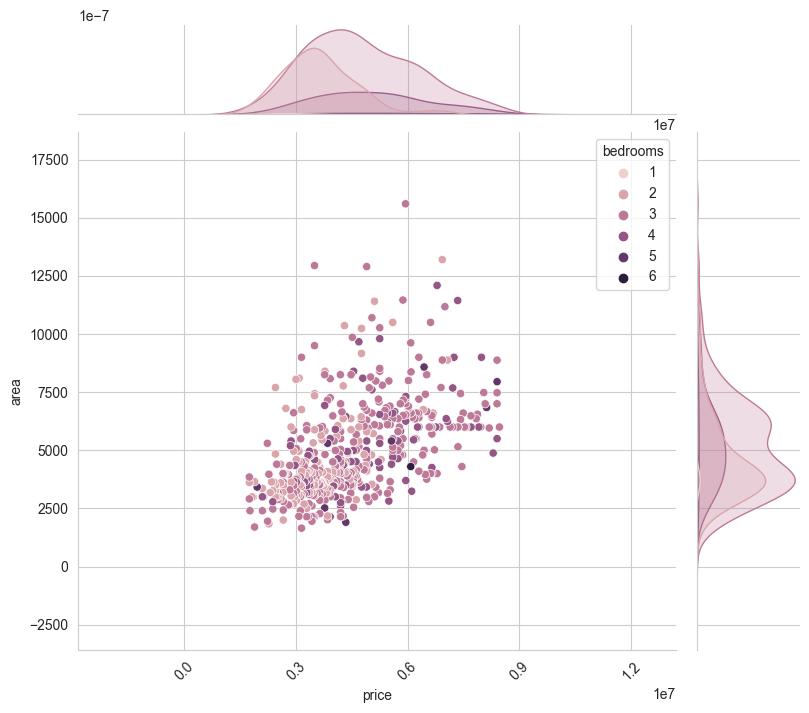

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
joint_plot = sns.jointplot(x='price',y='area',data=df, height=8, hue='bedrooms')
ax = joint_plot.ax_joint
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.show()

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

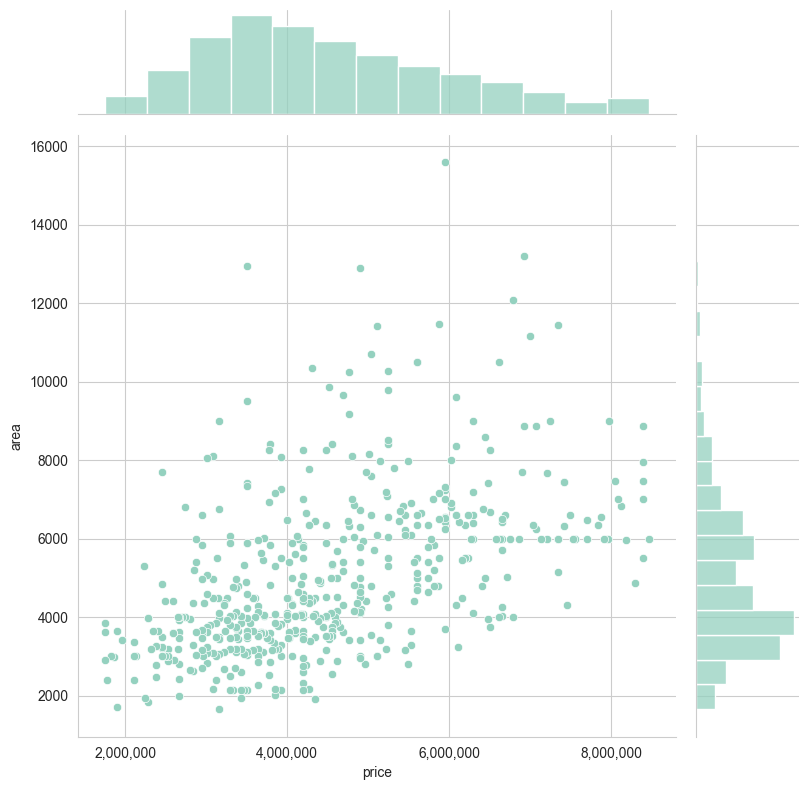

In [30]:
import matplotlib.ticker as ticker
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
plot = sns.jointplot(x='price', y='area', data=df, height=8)
plot.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(base=2e6))  # Set the base for the locator
plot.ax_joint.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format the string for the locator
plt.show()

In [31]:
df.to_pickle('dataframe.pkl')

##Feature engineering

**So far we've gotten an idea of how our data is correlated, and we may already have an idea of which features we wish to use for our feature matrix. We can however do more than simply check correlations between data points. We can check what's known as feature importances. In order to do this we need to engineer the data in a way so that we can feed it to the SML model we choose.**

In [32]:
df['area_z'] = (df['area'] - df['area'].mean())/df['area'].std(ddof=0)
df['area_z'] = df['area_z'].abs()
df = df[df.area_z < 2]

In [33]:
df.head()

,price,area,bedrooms,bathrooms,parking,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price_z,area_z
26,8463000,6000,3,2,0,4,1,1,1,0,1,1,1,1.977966,0.467418
27,8400000,8875,3,1,1,1,1,0,0,0,0,0,1,1.944253,1.854154
28,8400000,7950,5,2,2,2,1,0,1,1,0,0,0,1.944253,1.407987
29,8400000,5500,4,2,1,2,1,0,1,0,1,1,1,1.944253,0.226246
30,8400000,7475,3,2,2,4,1,0,0,0,1,0,0,1.944253,1.178874


In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'price_z', 'area_z'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 41 to 368
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              100 non-null    int64
 1   bedrooms          100 non-null    int64
 2   bathrooms         100 non-null    int64
 3   parking           100 non-null    int64
 4   stories           100 non-null    int64
 5   mainroad          100 non-null    int64
 6   guestroom         100 non-null    int64
 7   basement          100 non-null    int64
 8   hotwaterheating   100 non-null    int64
 9   airconditioning   100 non-null    int64
 10  prefarea          100 non-null    int64
 11  furnishingstatus  100 non-null    int64
dtypes: int64(12)
memory usage: 10.2 KB


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

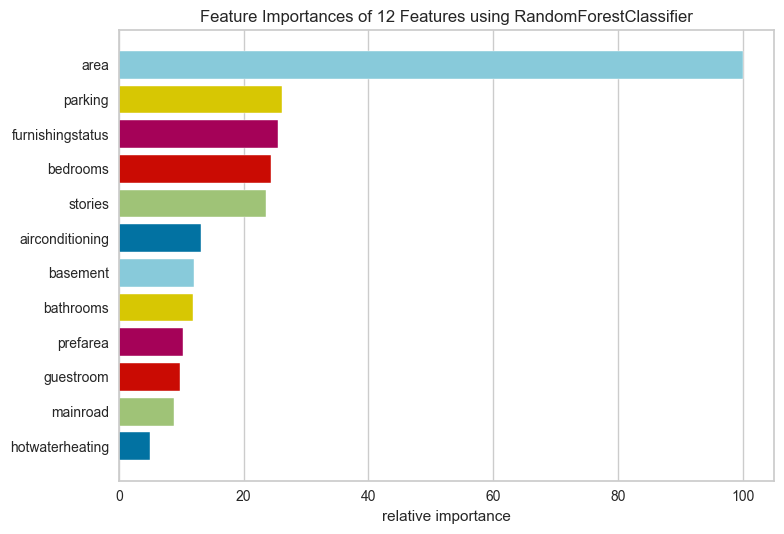

<Axes: title={'center': 'Feature Importances of 12 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [37]:
# Feature importance
from yellowbrick.features import FeatureImportances

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [38]:
selected_df = df[['area', 'parking', 'furnishingstatus', 'bedrooms', 'stories']]

**BONUS TASK:** <br>
It may be possible to define new features, for example as a combination of two existing ones in order to increase predictability. If you believe you can create new features, this is the time to do it <br>
(Note: This step is not necessarily needed, but more if you're feeling adventurous, or if your model is not performing as well as you had hoped)

**In order to fit a model to our data, we need to encode the categorical values for prediction. <br> Encode the categorical features in the dataframe**

##Creating target and feature + final evaluation of dimensions

**Separate the target feature from the rest**




In [39]:
from sklearn.model_selection import train_test_split

selected_df['target'] = pd.Series(df.price)
X = selected_df.drop(['target'], axis=1)
y = selected_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\roger\AppData\Local\Temp\ipykernel_17232\3704252215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['target'] = pd.Series(df.price)


**Next up:**<br> I want you to evaluate whats known as the feature importances of the data. (Hint: Most SML models has a class attribute for this) <br>
**Reflect:**<br> Do we evaluate feature importances *before* or *after* we do the train_test_split? What are some possible issues/benefits with either approach? <br>
**Task:** Evaluate the feature importances of your data.

**Solution:** I do this *BEFORE* the feature importances, as I wish to increase the models ability to generalize to new data. If we base our selection on feature importances of all the data, it may lead to overly optimistic model evaluation.

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [41]:
model_xgb = XGBRegressor()

In [42]:
model_xgb.fit(X_train, y_train)

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_fl

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y_train)))

Model XGB 0.9815016676595875


c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_fl

In [44]:
y_pred_train = model_xgb.predict(X_train)

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_fl

In [45]:
mean_squared_error(y_train, y_pred_train, squared=False)

200854.30445523848

**Now that you have selected your target features through whichever method you preferred, you need to remove the excess features that you don't need.** <br>
*Note: If you've already performed the train_test_split, remember to remove them from both the test and training data*

#Fitting, testing and evaluating the model

**Okay! Now we got our feature and target matrix sorted (for now), we finally get to actually create our machine learning model.** <br><br>
**Task:** Select a suitable model for the type of prediction we are trying to make, fit it to your data and evaluate the performance using appropriate metrics. <br><br>
**Reflect**: Is the model performing well? If not, how can we increase the performance?

##**BONUS TASK - Hyperparameter tuning using GridSearchCV:**

One way to increase model performance is to perform what's known as a grid search of the hyperparameters of the model. Basically we try out different combinations of these hyperparameters in order to find the most optimal setup based on some form of scoring metric. Give it a try!  <br><br>
**NOTE:** These can take a while to run, so whilst it is a good approach, it ***can*** also cost a lot of time, and as you may have experienced, Colab tends to time out after a while. A way to think of it is the following;<br><br>

$$
\text {Total models tested} = \text {(Number of variables for parameter 1)} \space \times \text {(Number of variables for parameter 2)} \space \times \text {(Number of variables for parameter 3)} \space \text {...}\space \times \text {(Number of variables for parameter n)}
$$ <br>

**So if you're testing out the following param_grid;**
<br>3 variations of parameter 1,
<br>4 variations of parameter 2,
<br> 2 variations of parameter 3,
<br> 2 variations of parameter 5,
<br>5 variations of parameter 6
<br><br>**You get the following:** <br><br>

$$
\text {Total models tested} = 3 \times 4 \times 2 \times 2 \times 5 = 240
$$ <br>
As you can see it goes up quick, as we are already testing 240 versions of the model with different parameters. Whilst testing upwards of even 100 variations doesn't necessarily take that long (which I tried), you should still be careful to not just increase it to try out all possible combinations there are

## **Save the model components**

**When we have created our model, we want to able to use it outside of our development notebook, for this purpose we need to save each component we used for preprocessing, as well as the model itself**<br>
**Task:** <br>
Save the model components (the prediction model itself, the scaler and the label encoder)

#Creating the data pipeline

**Finally we want to streamline our preprocessing and prediction methods for new data points. To do this, we create what's known as a data pipeline. It's basically a function that performs the *same* preprocessing steps as what we did earlier on a new observation** <br><br>
**Task 1:** <br> Load in your components, and create a data pipeline function that will perform the preprocessing steps you did earlier all in one. Apply it to a new observation. <br><br>
**Task 2:** <br> Load in your model, and create a prediction function that will predict an outcome based on this new observation

#Bonus task: Create an interface to interact with your model

You can either create a simple gradio interface, or alternatively create a streamlit application.